# Airbnb Exploratory Data Analysis

### How can we help hosts improve their chances of getting a booking?

With Airbnb's rapid growth since 2008, Airbnb can be found almost anywhere in the world with more than 6 million listings worldwide and Airbnb listings in over 100,000 cities. With this many listings, I wanted to explore how successful hosts were on the platform, and explore the factors that differentiate the successful Airbnbs from other Airbnbs. 

As a frequent Airbnb users myself, the first thing that I look at when I am looking for a listing is the picture of the listing. The first picture usually makes the largest impression for me, therefore, I decided to create a image classifier that attemps to determine if a listing is successful or not just by looking at the first image. This can be found in the github folder with the title Airbnb Image Classifier. 

In this notebook, I will perform an explatory data analysis of Airbnbs from Hawaii. The Airbnb dataset was sourced from [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

## <a id='TOC'> Table of Contents </a>
<ol>
<li><a href='#section 1'> Description of the Data </a> </li>
<li><a href='#section 2'> Importing and Data Cleaning </a> </li>
<li><a href='#section 3'> Exploratory Data Analysis </a> </li>
<li><a href='#section 4'> Sentiment Analysis </a> </li>
<li><a href='#section 5'> Conclusion </a> </li>


## 1. <a id='section_1'>Description of the Data</a>
<a href='#TOC'>Back to table of Contents</a>

listings_info.csv contains 23505 rows and 69 columns. Each row indicates a listing in Hawaii. 

reviews.csv file that contains 551075 rows and 6 columns. Each row indicates a review of a listing.

amentiy is a seperate dataframe from listings_info that contains the information regarding the amenities provided by each listing.

## 2. <a id='section_2'>Importing and Data Cleaning</a>
<a href='#TOC'>Back to table of Contents</a>

### Importing the Data 

In [2]:
# Importing modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
# Importing the Data
listing = pd.read_csv('/Users/jpar746/Desktop/Work/Airbnb/listings_info.csv')
review = pd.read_csv('/Users/jpar746/Desktop/Work/Airbnb/reviews.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Displaying more columns 
pd.set_option('display.max_columns', 300)

In [5]:
# Displaying the data before any cleaning
print(listing.head())

     id                        listing_url       scrape_id last_scraped  \
0  3002  https://www.airbnb.com/rooms/3002  20190306152748   2019-03-06   
1  5065  https://www.airbnb.com/rooms/5065  20190306152748   2019-03-06   
2  5175  https://www.airbnb.com/rooms/5175  20190306152748   2019-03-06   
3  5269  https://www.airbnb.com/rooms/5269  20190306152748   2019-03-06   
4  5387  https://www.airbnb.com/rooms/5387  20190306152748   2019-03-06   

                                                name  \
0  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
1                                           MAUKA BB   
2                               Kai's Rustic Cottage   
3                                       'Auwai Suite   
4                Hale Koa Studio & 1 Bedroom Units!!   

                                             summary  \
0  Women or couples only. No men alone. Will Dedu...   
1  Perfect for your vacation, Staycation or just ...   
2                                           

### Cleaning the Data

In [5]:
# Removing data from listing
remove_listing = ['scrape_id','minimum_minimum_nights','last_scraped','maximum_minimum_nights'
                  ,'experiences_offered','minimum_maximum_nights','maximum_maximum_nights','picture_url'
                  ,'medium_url','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_location'
                  ,'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_verifications'
                 ,'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed'
                  ,'smart_location','country_code','country','calendar_last_scraped','requires_license','license','jurisdiction_names'
                 ,'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms'
                  ,'calculated_host_listings_count_shared_rooms','calendar_updated','first_review','last_review'
                 ,'has_availability','market','zipcode']

listing.drop(columns = remove_listing, inplace=True)
listing.shape

(23505, 70)

In [6]:
# Replace all f and t with 0 and 1 
change_to_num = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact'
                 ,'instant_bookable','is_business_travel_ready','require_guest_profile_picture'
                 ,'require_guest_phone_verification']

for i in change_to_num:
    listing[i] = listing[i].apply(lambda x: 1 if x == 't' else 0)


In [7]:
print(listing.head())

     id                        listing_url  \
0  3002  https://www.airbnb.com/rooms/3002   
1  5065  https://www.airbnb.com/rooms/5065   
2  5175  https://www.airbnb.com/rooms/5175   
3  5269  https://www.airbnb.com/rooms/5269   
4  5387  https://www.airbnb.com/rooms/5387   

                                                name  \
0  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
1                                           MAUKA BB   
2                               Kai's Rustic Cottage   
3                                       'Auwai Suite   
4                Hale Koa Studio & 1 Bedroom Units!!   

                                             summary  \
0  Women or couples only. No men alone. Will Dedu...   
1  Perfect for your vacation, Staycation or just ...   
2                                                NaN   
3  The 'Auwai Suite is a lovely, self-contained a...   
4  This Wonderful Spacious Studio apt/flat is in ...   

                                               sp

In [8]:
# Adding amenities to the dataframe
amenity = listing['amenities'].map(lambda x: '|'.join([a.replace('}','').replace('{','').replace('"','') 
                                                       for a in x.split(',')]))

# Unique amenities 
unq_amenity = list(np.unique(np.concatenate(amenity.map(lambda x: x.split("|"))))[1:])

amenity = amenity.map(lambda x: x.split("|"))

# Get the true or false values from unique list 
amenity_ar = np.array([amenity.map(lambda x: amn in x) for amn in unq_amenity])
amenity_ar = np.transpose(amenity_ar)


amenity_df = pd.concat([listing['id'], pd.DataFrame(data = amenity_ar, columns = unq_amenity)], axis=1)

# Remove unnecessary amenity columns 
amenity_df.drop(['translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50']
             , axis = 1, inplace=True)

In [9]:
# Replace all False and True with 1 and 0 for amenity_df
amenity_df = amenity_df.applymap(lambda x: 1 if x == True else x)
amenity_df = amenity_df.applymap(lambda x: 0 if x == False else x)

print(amenity_df.head())
print(amenity_df.shape)

     id   toilet  24-hour check-in  Accessible-height bed  \
0  3002        0                 0                      0   
1  5065        0                 0                      0   
2  5175        0                 0                      0   
3  5269        0                 0                      0   
4  5387        0                 0                      0   

   Accessible-height toilet  Air conditioning  Air purifier  Alfresco bathtub  \
0                         0                 1             0                 0   
1                         0                 0             0                 0   
2                         0                 0             0                 0   
3                         0                 0             0                 0   
4                         0                 0             0                 0   

   Alfresco shower  Amazon Echo  BBQ grill  Baby bath  Baby monitor  \
0                0            0          0          0             0   
1   

In [10]:
# Remove amenities from the dataframe (Now that it is no longer needed)
listing.drop('amenities',axis=1, inplace=True)

In [11]:
# Remove % from host_response_rate and convert into int

listing['host_response_rate'] = np.nan_to_num(listing['host_response_rate'])
listing['host_response_rate'] = listing['host_response_rate'].astype(str)
listing['host_response_rate'] = listing['host_response_rate'].apply(lambda x: x.replace('nan', '0'))
listing['host_response_rate'] = listing['host_response_rate'].apply(lambda x: x.replace('%',''))
listing['host_response_rate'] = listing['host_response_rate'].astype(int)


In [12]:
# Remove the dollar signs and commas from price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people
remove_dollar = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
for col in remove_dollar:
    listing[col] = listing[col].astype(str)
    listing[col] = listing[col].apply(lambda x: x.replace('$',''))
    listing[col] = listing[col].apply(lambda x: x.replace(',',''))
    listing[col] = listing[col].astype(float)

print(listing.head())

     id                        listing_url  \
0  3002  https://www.airbnb.com/rooms/3002   
1  5065  https://www.airbnb.com/rooms/5065   
2  5175  https://www.airbnb.com/rooms/5175   
3  5269  https://www.airbnb.com/rooms/5269   
4  5387  https://www.airbnb.com/rooms/5387   

                                                name  \
0  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
1                                           MAUKA BB   
2                               Kai's Rustic Cottage   
3                                       'Auwai Suite   
4                Hale Koa Studio & 1 Bedroom Units!!   

                                             summary  \
0  Women or couples only. No men alone. Will Dedu...   
1  Perfect for your vacation, Staycation or just ...   
2                                                NaN   
3  The 'Auwai Suite is a lovely, self-contained a...   
4  This Wonderful Spacious Studio apt/flat is in ...   

                                               sp

In [13]:
# Convert host_since into datetime index 
listing['host_since'] = pd.to_datetime(listing['host_since'],format = '%Y-%m-%d')

In [14]:
# Setting the prices of 0 to np.NaN as it more accurately describes the data
listing['square_feet'] = listing['square_feet'].replace(0, np.NaN)
listing['price'] = listing['price'].replace(0, np.NaN)
listing['cleaning_fee'] = listing['cleaning_fee'].replace(0, np.NaN)

In [15]:
# Removing left space, right space, making is case insensitive
listing['city'] = listing['city'].astype(str)
listing['city'] = listing['city'].apply(lambda x:x.lower())
listing['city'] = listing['city'].apply(lambda x:x.title())

# Remove Commas 
listing['city'] = listing['city'].apply(lambda x:x.replace(',',''))

# Replace Village 
listing['city'] = listing['city'].apply(lambda x:x.replace('village',''))
listing['city'] = listing['city'].apply(lambda x: x.strip())

In [16]:
# Get the island county for each city 
city_county = {'Honolulu':'Honolulu','East Honolulu':'Honolulu', 'Pearl City':'Honolulu','Hilo':'Hawaii',
'Kailua':'Honolulu', 'Waipahu':'Honolulu','Kaneohe':'Honolulu','Mililani Town':'Honolulu',
'Kahului':'Maui','Ewa Gentry':'Honolulu','Mililani Mauka':'Honolulu','Kihei':'Maui',
'Makakilo':'Honolulu','Wahiawa':'Honolulu','Schofield Barracks':'Honolulu','Wailuku':'Maui',
'Kapolei':'Honolulu','Ewa Beach':'Honolulu','Royal Kunia':'Honolulu','Halawa':'Honolulu',
'Waimalu':'Honolulu','Waianae':'Honolulu','Nanakuli':'Honolulu','Kailua':'Hawaii',
'Lahaina':'Maui','Waipio':'Honolulu','Hawaiian Paradise Park':'Hawaii','Kapaa':'Kauai',
'Kalaoa':'Hawaii','Kaneohe Station':'Honolulu','Maili':'Honolulu','Aiea':'Honolulu',
'Waimea':'Hawaii','Waihee-Waiehu':'Maui','Ahuimanu':'Honolulu','Holualoa':'Hawaii',
'Ocean Pointe':'Honolulu','Makaha':'Honolulu','Haiku-Pauwela':'Maui','Pukalani':'Maui',
'Waikele':'Honolulu','Napili-Honokowai':'Maui','Makawao':'Maui','Hickam Housing':'Honolulu',
'Lihue':'Kauai','Kula':'Maui','Waikoloa Village':'Hawaii','Laie':'Honolulu','Ewa Villages':'Honolulu',
'Wailea':'Maui','West Loch Estate':'Honolulu', 'Waimanalo':'Honolulu','Waipio Acres':'Honolulu', 
'Wailua Homesteads':'Kauai', 'Heeia':'Honolulu','Kahaluu':'Honolulu','Kalaheo':'Kauai',
'Pupukea':'Honolulu','Whitmore Village':'Honolulu','Waimanalo Beach':'Honolulu','Hawaiian Ocean View':'Hawaii',
'Hawaiian Beaches':'Hawaii','Hauula':'Honolulu','Haleiwa':'Honolulu','Mountain View':'Hawaii',
'Waialua':'Honolulu','Hanamaulu':'Kauai','Kahaluu-Keauhou':'Hawaii','Kekaha':'Kauai',
'Captain Cook':'Hawaii','Kaunakakai':'Maui','Iroquois Point':'Honolulu','Lanai City':'Maui',
'Ainaloa':'Hawaii','Waikapu':'Maui','Puhi':'Kauai','Orchidlands Estates':'Hawaii',
'Kilauea':'Kauai','Hawaiian Acres':'Hawaii','Paia':'Maui','Hanapepe':'Kauai','Kahuku':'Honolulu',
'Volcano':'Hawaii','Honaunau-Napoopoo':'Hawaii','Honalo':'Hawaii','Eleele':'Kauai',
'Lawai':'Kauai','Honokaa':'Hawaii','Wailua':'Kauai','Keaau':'Hawaii','Anahola':'Kauai',
'Princeville':'Kauai','Koloa':'Kauai','Maunawili':'Honolulu','Kualapuu':'Maui','Kealakekua':'Hawaii',
'Waimea':'Kauai','Mokuleia':'Honolulu','Ko Olina':'Honolulu','Pepeekeo':'Hawaii','Kapaau':'Hawaii',
'Wheeler AFB':'Honolulu','Keokea':'Maui','Leilani Estates':'Hawaii','Fern Acres':'Hawaii','Nanawale Estates':'Hawaii',
'Kaaawa':'Honolulu','Pahala':'Hawaii','Makaha Valley':'Honolulu','Papaikou':'Hawaii','Omao':'Kauai',
'Kurtistown':'Hawaii','Hana':'Maui','Wainaku':'Hawaii','Punaluu':'Honolulu','Olinda':'Maui',
'Hawi':'Hawaii','Kaanapali':'Maui','Poipu':'Kauai','Haliimaile':'Maui','Discovery Harbour':'Hawaii',
'Pahoa':'Hawaii','Eden Roc':'Hawaii','Fern Forest':'Hawaii','Mahinahina':'Maui','Naalehu':'Hawaii',
'Waikane':'Honolulu','Puako':'Hawaii','Kaumakani':'Kauai','Paauilo':'Hawaii','Launiupoko':'Maui',
'Laupahoehoe':'Hawaii','Honomu':'Hawaii','Halaula':'Hawaii','Hanalei':'Kauai','Haena':'Kauai',
'Kalihiwai':'Kauai','Paukaa':'Hawaii','Ualapue':'Maui','Maunaloa':'Maui','Kapalua':'Maui',
'Maalaea':'Maui','Kukuihaele':'Hawaii','Kawela Bay':'Honolulu','Wainiha':'Kauai','Pakala Village':'Kauai',
'Waiohinu':'Hawaii','Makena':'Maui','Olowalu':'Maui','Kalaeloa':'Honolulu','Manele':'Maui'}

In [17]:
# Add country to the dataframe
listing['county'] = listing['city'].map(city_county)

In [18]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23505 entries, 0 to 23504
Data columns (total 70 columns):
id                                  23505 non-null int64
listing_url                         23505 non-null object
name                                23504 non-null object
summary                             22866 non-null object
space                               19556 non-null object
description                         23374 non-null object
neighborhood_overview               13403 non-null object
notes                               14021 non-null object
transit                             12633 non-null object
access                              13304 non-null object
interaction                         13432 non-null object
house_rules                         16827 non-null object
thumbnail_url                       0 non-null float64
xl_picture_url                      0 non-null float64
host_id                             23505 non-null int64
host_url                     

In [19]:
listing.shape

(23505, 70)

In [20]:
# Cleaning the review dataframe
review.columns.values[1] = 'review_id'
review.columns.values[2] = 'review_date'

print(review.head())

   listing_id  review_id review_date  reviewer_id reviewer_name  \
0        3002      63686  2010-07-11       155310        Debbie   
1        3002      71254  2010-07-31        75939        Bonnie   
2        3002     132520  2010-11-02       189930     Alexandra   
3        3002     158315  2010-12-25       291487       Shirley   
4        3002     168133  2011-01-08       331679     Elizabeth   

                                            comments  
0  Lynne is very kind and accommodating, the loca...  
1  I came back to the island on my own for my 25t...  
2  I had a wonderfull time in Hawaii. Lynne is a ...  
3  Lynn was a wonderful hostess and is a lovely, ...  
4  Just a short walk to Waikiki beach, restaurant...  


In [21]:
review.shape

(551075, 6)

## 3. <a id='section_3'>Exploratory Data Analysis</a>
<a href='#TOC'>Back to table of Contents</a>

### Location

In [22]:
# In which city are airbnb houses commonly located
print(listing['city'].value_counts().head())

Honolulu       5285
Kihei          2936
Lahaina        2462
Kailua-Kona    1518
Princeville     899
Name: city, dtype: int64


In [23]:
# Get the price by City 
print(listing.groupby('county')['price'].mean())

county
Hawaii      227.515152
Honolulu    242.901681
Kauai       338.204562
Maui        369.775170
Name: price, dtype: float64


We can observe that Honolulu has the largest number of airbnbs. Doubling the next most popular city with 5169 airbnb houses. 

(-161.0, -154.0, 18.0, 23.0)

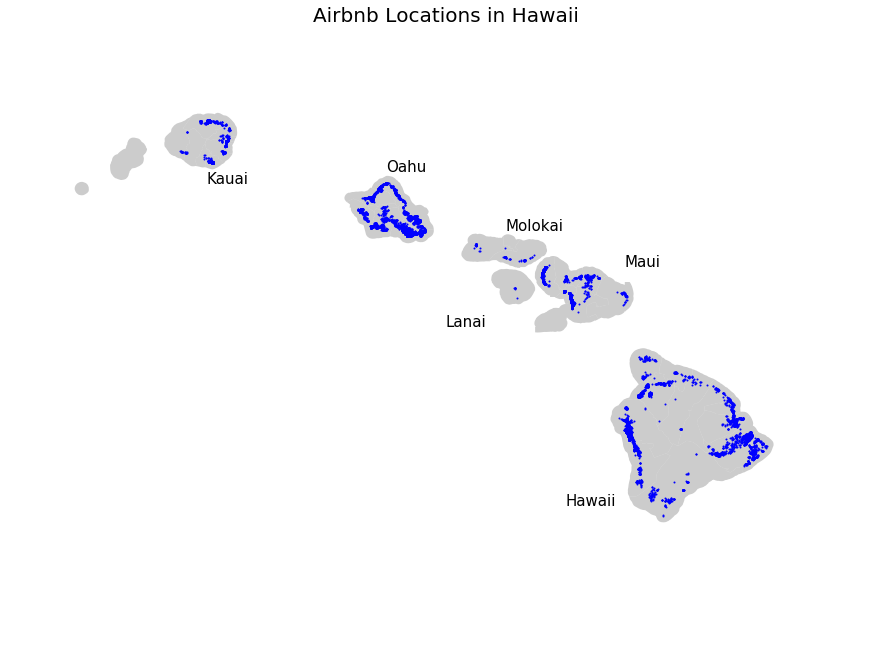

In [24]:
# Plotting the location of Airbnbs on Hawaii's map

#Importing the necessary modules
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Importing the map of hawaii 
street_map = gpd.read_file('/Users/jpar746/Desktop/Work/Airbnb/hawaii_map/tl_2016_15_cousub.shp')

# Creating a geodataframe
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(listing['longitude'],listing['latitude'])]
geo_df = gpd.GeoDataFrame(listing, crs = crs, geometry = geometry)

# Plotting the locations of Airbnbs on Hawaii's map
fig, ax = plt.subplots(figsize= (15,15))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
geo_df.plot(ax = ax, markersize=1, color = 'blue', marker ='o')
plt.xlim([-161, -154])
plt.ylim([18,23])

# Labeling the Islands 
plt.text(-156.5, 19, 'Hawaii', fontsize=15)
plt.text(-156, 21, 'Maui', fontsize=15)
plt.text(-157.5, 20.5, 'Lanai', fontsize=15)
plt.text(-157, 21.3, 'Molokai', fontsize=15)
plt.text(-158, 21.8, 'Oahu', fontsize=15)
plt.text(-159.5, 21.7, 'Kauai', fontsize=15)

# Settting the title 
plt.title('Airbnb Locations in Hawaii', fontsize = 20)
plt.axis('off')

From the graph, we can tell that the Hawaii and Oahu islands have the largest number of Airbnbs. 

### House Types 

In [25]:
# What are the 5 most common property types?
print(listing['property_type'].value_counts().head())

Condominium    9939
House          4997
Apartment      3295
Guest suite     963
Guesthouse      579
Name: property_type, dtype: int64


In [26]:
# Common Property Types by County 
print(listing.groupby('county')['property_type'].value_counts())

county  property_type         
Hawaii  House                     1200
        Guest suite                274
        Apartment                  232
        Guesthouse                 203
        Condominium                201
        Cottage                    148
        Bed and breakfast          105
        Cabin                       68
        Farm stay                   59
        Villa                       47
        Bungalow                    46
        Townhouse                   43
        Other                       22
        Tiny house                  15
        Nature lodge                11
        Treehouse                   11
        Loft                        10
        Tent                         9
        Boutique hotel               8
        Hostel                       8
        Hut                          7
        Dome house                   6
        Serviced apartment           6
        Yurt                         6
        Chalet                   

From the most common property types, we can observe that the most common property types are condominiums and houses. 

In [27]:
# What are the 5 most common room types?
print(listing['room_type'].value_counts())

Entire home/apt    20225
Private room        3140
Shared room          140
Name: room_type, dtype: int64


In [28]:
# What is the distribution of square feet for rental homes in Airbnb?
listing['square_feet'].describe()

count      178.000000
mean      1502.646067
std       6042.579362
min          1.000000
25%        500.000000
50%        800.000000
75%       1200.000000
max      80000.000000
Name: square_feet, dtype: float64

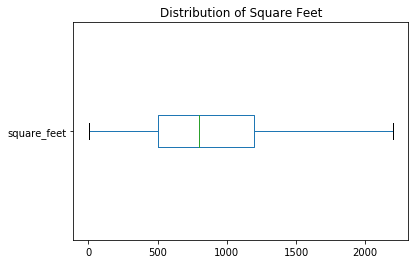

In [29]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Square Feet')
listing.boxplot(column='square_feet', showfliers=False, vert=False)
ax.grid(False)

We can observe that the square feet for the homes in airbnb have an median of 800 square feet. However, we can see that the distribution is skewed to the right. This tells us that majority of the airbnbs were smaller than the median and that there were outliers that were signifinicantly larger than the median

In [30]:
# What are the common bed types and number of beds in a home 
print(listing['bed_type'].value_counts())

print(listing['beds'].value_counts().head())

Real Bed         23422
Pull-out Sofa       34
Futon               28
Airbed              16
Couch                5
Name: bed_type, dtype: int64
1.0    7514
2.0    7029
3.0    4238
4.0    2757
5.0     831
Name: beds, dtype: int64


We can observe that majority of the beds in Hawaii were Real Beds and we can also observe that majority of the houses had either 1 or 2 beds.

In [31]:
# What are the different rooms in each Airbnb 
# Bathrooms 
print(listing['bathrooms'].value_counts().head())

# Bedrooms
print(listing['bedrooms'].value_counts().head())

1.0    13270
2.0     6724
3.0     1170
2.5      698
1.5      601
Name: bathrooms, dtype: int64
1.0    10038
2.0     6532
0.0     3250
3.0     2422
4.0      746
Name: bedrooms, dtype: int64


We can observe that most airbnbs have one bathroom and one bedrooms. 

In [32]:
# How many people does the airbnb accomodate?
print(listing['accommodates'].value_counts().head())

4    7434
2    5304
6    4816
3    1590
8    1443
Name: accommodates, dtype: int64


We can observe that Airbnbs in Hawaii have houses that typically accommodates 4 or 2 individuals.

### Amenities 

In [33]:
# Export Amenities 
export_csv = amenity_df.to_csv (r'/Users/jpar746/Desktop/Work/Airbnb/amenities.csv', index = None, header=True)

In [34]:
# What are some of the most common amenities?
amenity_id = []
amenity_val = []
for col in amenity_df.columns:
    if col != 'id':
        amenity_val.append(amenity_df[col].value_counts()[1])
        amenity_id.append(col)
amenity_num = pd.Series(index = amenity_id, data = amenity_val)
print(amenity_num.sort_values(ascending=False)[0:10])

Wifi                        22765
Kitchen                     21598
TV                          21210
Essentials                  21154
Washer                      20139
Dryer                       19602
Hair dryer                  19086
Hangers                     19010
Free parking on premises    18497
Smoke detector              18078
dtype: int64


We can observe that the most common amenities were Wifi, Kitchen, TV, Essentials, and Washers. With approximately 20,000 Airbnb houses having all of the above. 

### Pricing, Rating, and Availability

In [35]:
# Looking at the availability of homes in Airbnb 
print(listing['availability_365'].describe())

count    23505.000000
mean       204.962178
std        106.673951
min          0.000000
25%        129.000000
50%        221.000000
75%        293.000000
max        365.000000
Name: availability_365, dtype: float64


In [36]:
# Calculating the Occupancy Rate (How often do hosters have customers in their Airbnb)
occupancy_30 = (30 - listing['availability_30'])/30
occupancy_90 = (90 - listing['availability_90'])/90
occupancy_365 = (365 - listing['availability_365'])/365

print(occupancy_365.describe())

count    23505.000000
mean         0.438460
std          0.292257
min          0.000000
25%          0.197260
50%          0.394521
75%          0.646575
max          1.000000
Name: availability_365, dtype: float64


We can observe that as the occupancy of 30 and 90 days only look at a period of the last month and last 3 months, in order to observe how well their host is doing, it might be better to look at the occupancy_365 to get a better overall look at how popular their house is. 

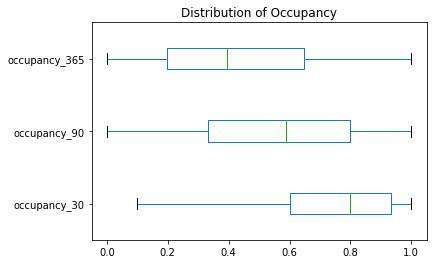

In [37]:
# Looking at the average occupancy of Airbnb homes for 30, 60, and 365 days
occupancy_df = pd.DataFrame(pd.concat([occupancy_30,occupancy_90,occupancy_365], axis=1))
occupancy_df.columns = ['occupancy_30','occupancy_90','occupancy_365']

fig, ax = plt.subplots()
ax.set_title('Distribution of Occupancy')
occupancy_df.boxplot(showfliers=False, vert=False)
ax.grid(False)

From this boxplot, we can observe that in a year the average occupancy would be approximately 40%. However, in the past month and 3 months, we can also observe that the occupancy is significantly larger in Hawaii with the occupancy of the past 3 months at approximately at 60% and the occuapncy of the last month at 80%.

According to the Hawaii Tourism Authority, hotels had an occupancy rating of 81 to 66%. This hints to us that Airbnbs in Hawawii are pretty successful with an occupancy of 60% for the past 3 months and an average occupancy of 80% in the last month.

count    23487.000000
mean       300.135948
std        561.414302
min         10.000000
25%        120.000000
50%        190.000000
75%        312.500000
max      24999.000000
Name: price, dtype: float64


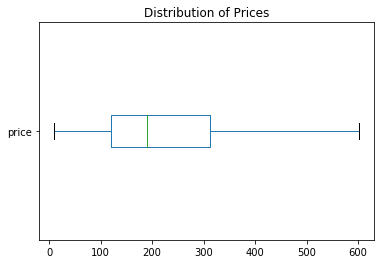

In [38]:
# Looking at the distribution of prices
print(listing['price'].describe())

# Plotting the distribution of prices
fig, ax = plt.subplots()
ax.set_title('Distribution of Prices')
listing.boxplot(column='price', showfliers=False, vert=False)
ax.grid(False)

From this boxplot, we can observe that the distribution of prices for Airbnbs in Hawaii have an interquartile range of approximately 200 dollars. We can also observe that the median price of houses in Hawaii were 190 dollars. We can also observe that the distribution of prices are skewed to the right, this indicates to us that there were outliers such as luxury houses in Hawaii that skewed the distribution to the right. 

count    21003.000000
mean       183.787935
std        153.520123
min          5.000000
25%         98.000000
50%        150.000000
75%        230.000000
max       4475.000000
Name: cleaning_fee, dtype: float64


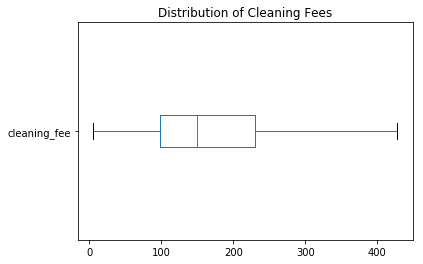

In [39]:
# Looking at the distribution of cleaning fees
print(listing['cleaning_fee'].describe())

# Plotting the distribution of cleaning prices
fig, ax = plt.subplots()
ax.set_title('Distribution of Cleaning Fees')
listing.boxplot(column='cleaning_fee', showfliers=False, vert=False)
ax.grid(False)

We can also observe a similar pattern for the distribution of cleaning fees. The distribution is skewed to the right. This again confirms out theory that the luxury houses are the outliers of this data. We can also observe that the median cleaning fee is approximately 150 dollars.

count    2.348700e+04
mean     4.742001e+04
std      1.520870e+05
min      0.000000e+00
25%      1.225000e+04
50%      2.686000e+04
75%      5.136650e+04
max      9.124635e+06
Name: revenue_365, dtype: float64


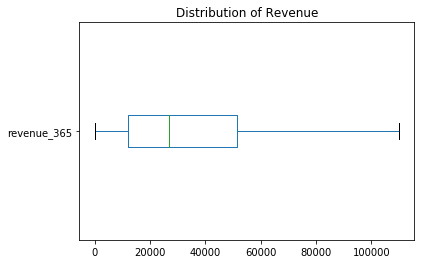

In [40]:
# Ways that we can measure if a airbnb is successful. 
# Looking at the revenue that the host earns from renting out their homes (Occupancy_365 * price)
listing['revenue_365'] = (365-listing['availability_365']) * listing['price']

# We want to look at the distribution of revenue_365 
print(listing['revenue_365'].describe())

# Plotting the distribution of revenue
fig, ax = plt.subplots()
ax.set_title('Distribution of Revenue')
listing.boxplot(column = 'revenue_365',showfliers=False, vert=False)
ax.grid(False)


From this boxplot, we can observe that the median revenue for hosters were approximately 26,000 dollars. We can observe that some popular Airbnbs can make more than to 100,000 dollars. We can also observe that the distribution of revenues is also skewed to the right.   

In [41]:
# What are the metrics that we can look at to determine if a Airbnb house is successful?
# Assign houses with revenue of over 50,000 would be my standard of a successful airbnb
listing['success'] = 0
listing.loc[listing['revenue_365'] >= 50000, 'success'] = 1

# What is the percentage of houses that are considered successful?
percent_success = listing['success'].value_counts()[1]*100 / (listing['success'].value_counts()[1]+listing['success'].value_counts()[0])
print('About '+ str(percent_success.round(2))+'%'+' are considered successful.')

About 25.85% are considered successful.


In [42]:
# What are the amenities that lead to the success of Airbnbs 
amenity_success = pd.concat([listing['success'],amenity_df])
amenity_success= amenity_success.rename(columns = {0:'success'})
amenity_success = amenity_success.apply(lambda x: x.fillna(0))
print(amenity_success.head())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


   success   id   toilet  24-hour check-in  Accessible-height bed  \
0      0.0  0.0      0.0               0.0                    0.0   
1      0.0  0.0      0.0               0.0                    0.0   
2      0.0  0.0      0.0               0.0                    0.0   
3      0.0  0.0      0.0               0.0                    0.0   
4      0.0  0.0      0.0               0.0                    0.0   

   Accessible-height toilet  Air conditioning  Air purifier  Alfresco bathtub  \
0                       0.0               0.0           0.0               0.0   
1                       0.0               0.0           0.0               0.0   
2                       0.0               0.0           0.0               0.0   
3                       0.0               0.0           0.0               0.0   
4                       0.0               0.0           0.0               0.0   

   Alfresco shower  Amazon Echo  BBQ grill  Baby bath  Baby monitor  \
0              0.0         

In [43]:
# Looking at the correlation between success and each amenity 
amenity_success.corr()

,success,id,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Alfresco shower,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bar,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach,Beach chairs,Beach club,Beach essentials,Beach view,Beach volleyball,Beachfront,Bed linens,Bedroom comforts,Bicycle,Bidet,Blu-Ray player,Body soap,Boogie boards,Breakfast,Breakfast bar,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Canoe,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling fans,Ceiling hoist,Central air conditioning,Changing table,Charcoal barbeque,Chef's kitchen,Childrens pool,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Computer,Conference room,Convection oven,Cooking basics,Courtyard,Crib,DVD player,Day bed,Dining area,Dining table,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,EV charger,Electric profiling bed,Elevator,En suite bathroom,Espresso machine,Essentials,Ethernet connection,Exercise equipment,Extra pillows and blankets,Family/kid friendly,Fax machine,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to front door,Foosball table,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Game room,Garage parking,Garden,Garden or backyard,Gas grill,Gas oven,Gated property,Gazebo,Golf course access,Ground floor access,Guesthouse,Gym,HBO GO,Hair dryer,Hammock,Handheld shower head,Hangers,Heated pool,Heated towel rack,Heating,High chair,Home theater,Host greets you,Hot tub,Hot water,Hot water kettle,Ice Machine,Indoor fireplace,Infinity pool,Internet,Iron,Ironing Board,Jet skis,Jetted tub,Kayak,Keypad,Kitchen,Kitchenette,Lake access,Lanai,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Lounge area,Luggage dropoff allowed,Massage room,Meditation room,Memory foam mattress,Microwave,Mini fridge,Mobile hoist,Mountain view,Movie Collection,Murphy bed,Natural gas barbeque,Netflix,Office,Other,Other pet(s),Outdoor kitchen,Outdoor parking,Outdoor seating,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Parking,Patio or balcony,Pets allowed,Pets live on this property,Phone,Piano,Pillow-top mattress,Pocket wifi,Pond,Pool,Pool table,Pool toys,Pool with pool hoist,Printer,Private bathroom,Private entrance,Private gym,Private hot tub,Private living room,Private pool,Propane barbeque,Putting green,Rain shower,Refrigerator,Roll-in shower,Room-darkening shades,Safe,Safety card,Saltwater pool,Satellite TV,Sauna,Security system,Self check-in,Shampoo,Shared gym,Shared hot tub,Shared pool,Shower bathtub combo,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Snorkeling equipment,Soaking tub,Sound system,Spa,Spa access,Stair gates,Stand alone shower,Step-free access,Stove,Suitable for events,Sun loungers,Swimming pool,TV,Table corner guards,Tennis club,Tennis court,Terrace,Toaster,Toilet paper,Veranda,Video Games,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wet bar,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower,Wide doorway,Wide entryway,Wide hallway clearance,Wifi,Window guards,Windsurfers,Wine cooler,Wine storage,Wood-burning oven
success,1.000000,-0.320818,-0.037578,-0.101500,-0.051270,-0.049023,-0.267086,-0.001777,-0.002513,-0.009236,-0.003078,-0.161002,-0.023752,-0.011792,-0.046150,-0.024801,-0.003974,-0.024737,-0.017877,-0.108951,-0.013773,-0.002513,-0.014771,-0.001777,-0.125843,-0.010365,-0.001777,-0.092612,-0.195794,-0.017877,-0.011383,-0.002513,-0.001777,-0.024543,-0.016105,-0.059581,-0.003974,-0.007948,-0.071873,-0.028057,-0.239983,-0.005620,-0.159769,-0.044975,-0.026658,-0.003974,-0.002513,-0.006156,-0.016874,-0.001777,-

In [44]:
# Find the 10 most important correlation for success from the array above 
# First row of the amenity_success.corr() which is the success column
corr = amenity_success.corr()

# Drop Success
corr_suc = corr['success'].apply(lambda x:abs(x))
corr_suc = corr_suc.drop(['success','id'])
print(corr_suc.nlargest(10))

Wifi                        0.373327
Kitchen                     0.355185
TV                          0.349323
Essentials                  0.348484
Washer                      0.333537
Dryer                       0.325820
Hair dryer                  0.318519
Hangers                     0.317453
Free parking on premises    0.310310
Smoke detector              0.304546
Name: success, dtype: float64


By calculating the correlation between all the features and success, we found that Wifi, Kitchen, TV, Essentials, and Washers were the most important amentities that contributed to the success of a listing. However, these are also the most common amenities of the listings. Some of the less common amentities that hosts could include that could improve their success would be Dryer, Hair dryer, Hangers, Smoke detectors, and Free parking. 

count    23505.000000
mean        23.445012
std         41.775147
min          0.000000
25%          1.000000
50%          6.000000
75%         28.000000
max        572.000000
Name: number_of_reviews, dtype: float64


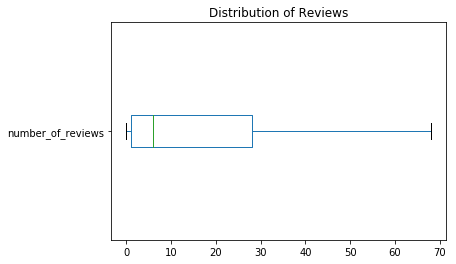

In [45]:
# Looking at Reviews 
# What is the average of number of reviews that houses got
print(listing['number_of_reviews'].describe())

# Looking at the distribution of number of reviews 
fig, ax = plt.subplots()
ax.set_title('Distribution of Reviews')
listing.boxplot(column='number_of_reviews', showfliers=False, vert=False)
ax.grid(False)

By looking at the median of 6 reviews, we can observe that most Airbnb guests do not provide a review after their stay. 

       review_scores_accuracy  review_scores_cleanliness  \
count            17624.000000               17628.000000   
mean                 9.679698                   9.508963   
std                  0.761859                   0.863248   
min                  2.000000                   2.000000   
25%                 10.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  
count           17614.000000                 17622.000000  
mean                9.784944                     9.749120  
std                 0.673587                     0.716727  
min                 2.000000                     2.000000  
25%                10.000000                    10.000000  
50%                10.000000                    10.000000  
75%                10.000000           

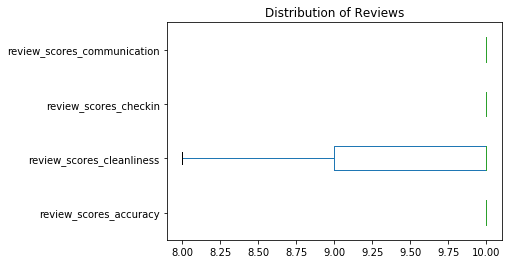

In [46]:
# Looking at the different aspects of reviews 

reviews_df = listing[['review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication']]

print(reviews_df.describe())

fig, ax = plt.subplots()
ax.set_title('Distribution of Reviews')
reviews_df.boxplot(showfliers=False, vert=False)
ax.grid(False)

We can observe that majority of the ratings for homes have almost no distribution. There is no interquartile range communication, checkin, and accuracy. This could be because of the fact that many guests are lenient with their scoring of these homes. However, cleanliness has some deviations. This could indicate to us that some homes were not as clean as others. (This could be an area that hosts could improve for their guests)

## Host

In [47]:
# Looking at super hosts and regular hosts 
print(listing['host_is_superhost'].value_counts())

0    16341
1     7164
Name: host_is_superhost, dtype: int64


We can observe that only 7000 out of approximately 23,000 houses are operated by a superhost. A superhost can be defined as experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Their activities are also checked by Airbnb four times in a year. 

In [48]:
# Comparing the success of hosts who are super hosts and those who are regular hosts 
superhost_success = listing.loc[listing['host_is_superhost'] == 1, 'success'].value_counts()

print(str(superhost_success[1]*100 / (superhost_success[0] + superhost_success[1])) +
      '% of superhosts are successful')

22.20826353992183% of superhosts are successful


In [49]:
#  Looking at the ratio of regular hosts who are successful 
regular_success = listing.loc[listing['host_is_superhost'] == 0, 'success'].value_counts()

print(str(regular_success[1]*100 / (regular_success[0] + regular_success[1])) +
      '% of regular hosts are successful')

27.446300715990454% of regular hosts are successful


We can observe that only 22% of superhosts were successful and 27% of regular hosts were successful. This illustrates that being a super host is not required to have a successful Airbnb business. 

count     7163.000000
mean       264.079994
std        533.696706
min         25.000000
25%        115.000000
50%        170.000000
75%        274.000000
max      24999.000000
Name: price, dtype: float64
count    16324.000000
mean       315.957363
std        572.453300
min         10.000000
25%        125.000000
50%        200.000000
75%        335.000000
max      24999.000000
Name: price, dtype: float64


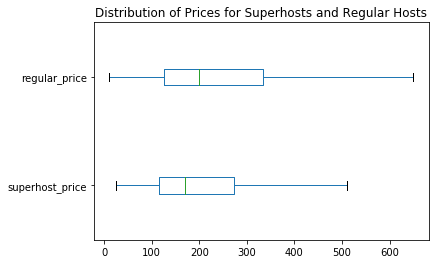

In [50]:
# Looking at the prices that superhosts charge 
superhost_price = listing.loc[listing['host_is_superhost'] == 1, 'price']
print(superhost_price.describe())

regular_price = listing.loc[listing['host_is_superhost'] == 0, 'price']
print(regular_price.describe())

# Converting into a DataFrame to plot 
host_price = pd.concat([superhost_price,regular_price], axis= 1)
host_price.columns = ['superhost_price','regular_price']

fig, ax = plt.subplots()
ax.set_title('Distribution of Prices for Superhosts and Regular Hosts')
host_price.boxplot(showfliers=False, vert=False)
ax.grid(False)

count    7.163000e+03
mean     4.344046e+04
std      1.621537e+05
min      0.000000e+00
25%      1.342500e+04
50%      2.655300e+04
75%      4.625000e+04
max      9.124635e+06
Name: revenue_365, dtype: float64
count    1.632400e+04
mean     4.916625e+04
std      1.474242e+05
min      0.000000e+00
25%      1.150000e+04
50%      2.707800e+04
75%      5.391850e+04
max      9.124635e+06
Name: revenue_365, dtype: float64


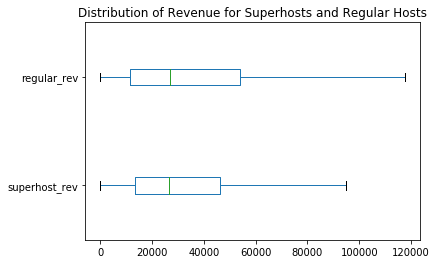

In [51]:
# Exploring the difference in revenue for superhosts and regular  hosts 
# Looking at the prices that superhosts charge 
superhost_rev = listing.loc[listing['host_is_superhost'] == 1, 'revenue_365']
print(superhost_rev.describe())

regular_rev = listing.loc[listing['host_is_superhost'] == 0, 'revenue_365']
print(regular_rev.describe())

# Converting into a DataFrame to plot 
host_price = pd.concat([superhost_rev,regular_rev], axis= 1)
host_price.columns = ['superhost_rev','regular_rev']

fig, ax = plt.subplots()
ax.set_title('Distribution of Revenue for Superhosts and Regular Hosts')
host_price.boxplot(showfliers=False, vert=False)
ax.grid(False)

We can also observe that the revenue for regular hosts and superhosts were about the same. With the median for superhots being 26,000 and the median for regular hosts being 27,000. This illustrates that Airbnb guests do not differentiate between super hosts and regular hosts. 

count    23505.000000
mean        92.103978
std         21.420947
min          0.000000
25%         98.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64


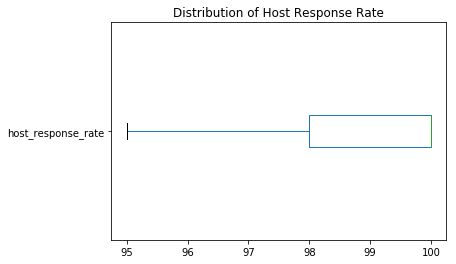

In [52]:
# Looking at the distribution of Host Response Rate 
print(listing['host_response_rate'].describe())

fig, ax = plt.subplots()
ax.set_title('Distribution of Host Response Rate')
listing.boxplot(column = 'host_response_rate',showfliers=False, vert=False)
ax.grid(False)

We can observe that majority of hosts responded to inquries and host requests from guests. In fact the median of 100% demonstrates that almost all hosts are active on Airbnb looking to host guests.

<BarContainer object of 5 artists>

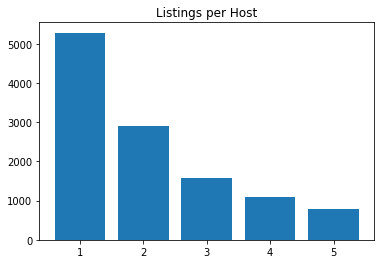

In [53]:
# Looking at the number of total listings that a host may have 
listing_hosts = listing['host_total_listings_count'].value_counts()[0:5]

fig, ax  = plt.subplots()
ax.set_title('Listings per Host')
ax.bar(x = listing_hosts.index, height = listing_hosts.values )

We can observe that most hosts typically list fewer than 5 homes. With most listing 1 to 2 homes. 

         host_since
count  23505.000000
mean    1323.417783
std      744.391689
min       83.000000
25%      766.000000
50%     1215.000000
75%     1784.000000
max     3962.000000


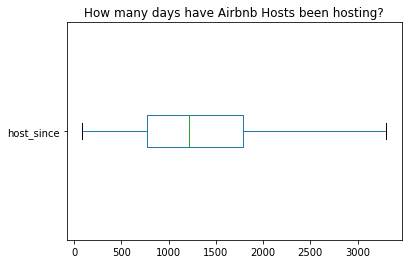

In [64]:
# How long has the the typical host been hosting Airbnbs?
today_date = pd.to_datetime('today')
days = today_date - listing['host_since']
days = days.map(lambda x:x.days)
listing['host_days'] = days
days = pd.DataFrame(days)
print(days.describe())

fig, ax = plt.subplots()
ax.set_title('How many days have Airbnb Hosts been hosting?')
days.boxplot(showfliers=False, vert=False)
ax.grid(False)

We can observe that the typical host has been hosting for approximately 1196 days. Which is approximately 3 years. However, there are some individuals who have been hosting for longer. 

In [65]:
# Does hosting for longer lead to better revenue (Longer hosts - more than 1700 days)
longer_host_rev = listing.loc[listing['host_days']>= 1700, 'success'].value_counts()

shorter_host_rev = listing.loc[listing['host_days']<= 1700, 'success'].value_counts()

print('More experienced hosts have a success rate of ' + str(longer_host_rev[1]*100/(longer_host_rev[0] + longer_host_rev[1])))
print('Less experienced hosts have a success rate of ' + str(shorter_host_rev[1]*100/(shorter_host_rev[0] + shorter_host_rev[1])))

More experienced hosts have a success rate of 20.859375
Less experienced hosts have a success rate of 27.719646928158063


From the success rate of more experienced and less experienced hosts, we can observe that being more experienced does not necessarily help you become a successful Airbnb host. 

## 4. <a id='section_1'>Sentiment Analysis</a>
<a href='#TOC'>Back to table of Contents</a>

In order to understand how positive or negative the comments about each listing_id was, I decided to look at the polarity of these comments. I did this using the TextBlob module. WARNING: THIS WILL TAKE A LONG TIME. 

From this polarity, -1 indicates be a strongly negative review while a 1 indicates a very positive review.

In [56]:
print(review.head())

# Convert comments into all strings 
review['comments'] = review['comments'].astype(str)

   listing_id  review_id review_date  reviewer_id reviewer_name  \
0        3002      63686  2010-07-11       155310        Debbie   
1        3002      71254  2010-07-31        75939        Bonnie   
2        3002     132520  2010-11-02       189930     Alexandra   
3        3002     158315  2010-12-25       291487       Shirley   
4        3002     168133  2011-01-08       331679     Elizabeth   

                                            comments  
0  Lynne is very kind and accommodating, the loca...  
1  I came back to the island on my own for my 25t...  
2  I had a wonderfull time in Hawaii. Lynne is a ...  
3  Lynn was a wonderful hostess and is a lovely, ...  
4  Just a short walk to Waikiki beach, restaurant...  


In [57]:
# Using TextBlob to determine the polarity of each comment
# WARNING THIS MAY TAKE A WHILE
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
import re

blobber = Blobber(analyzer=NaiveBayesAnalyzer())
pol_list = []
for row in review['comments']:
    text = row
    blob = blobber(text) 
    result = [text, blob.polarity]
    pol_list.append(result[1])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jpar746/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jpar746/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
# Adding polarity to the review dataframe
review['polarity'] = pol_list
print(review.head())

   listing_id  review_id review_date  reviewer_id reviewer_name  \
0        3002      63686  2010-07-11       155310        Debbie   
1        3002      71254  2010-07-31        75939        Bonnie   
2        3002     132520  2010-11-02       189930     Alexandra   
3        3002     158315  2010-12-25       291487       Shirley   
4        3002     168133  2011-01-08       331679     Elizabeth   

                                            comments  polarity  
0  Lynne is very kind and accommodating, the loca...  0.593333  
1  I came back to the island on my own for my 25t...  0.477232  
2  I had a wonderfull time in Hawaii. Lynne is a ...  0.317500  
3  Lynn was a wonderful hostess and is a lovely, ...  0.618750  
4  Just a short walk to Waikiki beach, restaurant...  0.210370  


count    551075.000000
mean          0.398564
std           0.216216
min          -1.000000
25%           0.275000
50%           0.391667
75%           0.516667
max           1.000000
Name: polarity, dtype: float64


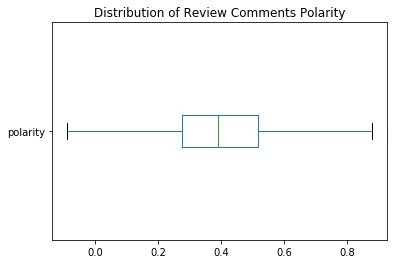

In [59]:
# Looking at the distribution of polarity 
print(review['polarity'].describe())

fig, ax = plt.subplots()
ax.set_title('Distribution of Review Comments Polarity')
review.boxplot(column = 'polarity',showfliers=False, vert=False)
ax.grid(False)

We can observe from the distribution of review comments that the median polarity were 0.39. This tells us that most comments made my guests are on the positive side. In addition, the lower quartile and upper quartile were 0.3 and 0.5. This again highlights the fact that guests are usually pretty generous with their comments on Airbnb.

In [60]:
# Averaging Comments Polarity and adding them to listing
pol_df = review.groupby('listing_id')['polarity'].mean()
pol_df = pd.DataFrame(pol_df)
listing_pol = listing.merge(pol_df, left_on='id', right_on='listing_id')
print(listing_pol.head())

     id                        listing_url  \
0  3002  https://www.airbnb.com/rooms/3002   
1  5065  https://www.airbnb.com/rooms/5065   
2  5175  https://www.airbnb.com/rooms/5175   
3  5269  https://www.airbnb.com/rooms/5269   
4  5387  https://www.airbnb.com/rooms/5387   

                                                name  \
0  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
1                                           MAUKA BB   
2                               Kai's Rustic Cottage   
3                                       'Auwai Suite   
4                Hale Koa Studio & 1 Bedroom Units!!   

                                             summary  \
0  Women or couples only. No men alone. Will Dedu...   
1  Perfect for your vacation, Staycation or just ...   
2                                                NaN   
3  The 'Auwai Suite is a lovely, self-contained a...   
4  This Wonderful Spacious Studio apt/flat is in ...   

                                               sp

In [61]:
# Comparing the polarity of successful listings vs not successful listings
success_pol = listing_pol.loc[listing_pol['success'] == 1, 'polarity']
not_success_pol = listing_pol.loc[listing_pol['success'] == 0, 'polarity']

print(success_pol.describe())
print(not_success_pol.describe())

count    3650.000000
mean        0.419792
std         0.155269
min        -0.100000
25%         0.351737
50%         0.417764
75%         0.486563
max         1.000000
Name: polarity, dtype: float64
count    14160.000000
mean         0.397607
std          0.117176
min         -0.700000
25%          0.353145
50%          0.400468
75%          0.444489
max          1.000000
Name: polarity, dtype: float64


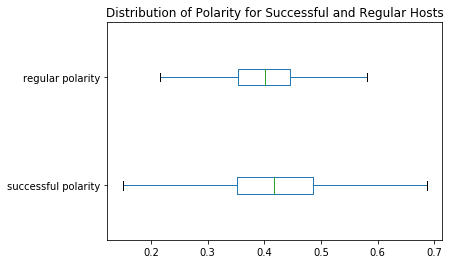

In [62]:
# Converting into a DataFrame to plot polarity
polarity = pd.concat([success_pol,not_success_pol], axis= 1)
polarity.columns = ['successful polarity','regular polarity']

fig, ax = plt.subplots()
ax.set_title('Distribution of Polarity for Successful and Regular Hosts')
polarity.boxplot(showfliers=False, vert=False)
ax.grid(False)

From the boxplot above, we can observe that the polarity for successful hosts is higher than the polarity for regular hosts. While the median for both regular polarity and successful polartiy may be approximately the same, the successful houses definately had more outliers that scored higher in terms of polarity. Allowing the graph to be skewed more to the right. 

In [63]:
export_csv = listing.to_csv (r'/Users/jpar746/Desktop/Work/Airbnb/listing_complete.csv', index = None, header=True)
export_csv = listing_pol.to_csv (r'/Users/jpar746/Desktop/Work/Airbnb/listing_pol.csv', index = None, header=True)

## 5. <a id='section_5'>Conclusion</a>
<a href='#TOC'>Back to table of Contents</a>

From this exploratory data analysis, I looked at numerous aspects of an Airbnb host. In terms of location, we found that Oahu and Hawaii had the largest number of Airbnbs. These are popular tourist destinations among Hawaii, therefore, It makes sense that Airbnbs are heavily concentrated in these areas. The most common room types were entire homes and apartments with the average square feet being approximately 800 square feet. Most Airbnbs in Hawaii also had a single bathroom and a single bedroom. With each house typically accomodating 2 to 4 guests. 

In terms of amenities, the most common amenities provided by houses were Wifi, Kitchen, TV, Essentials, and Washers. When we also explored the different types of amenities that correlated to success, we found that these amenities had the highest correlation to success of Airbnbs. However, there were other amenities such as Dryer, Hair Dryers, Hangers, Smoke Detectors, and Free Parking had a positive impact on success with a r value of over 0.3. 

By looking at the availability of Airbnbs in Hawaii, I found that the median listing would be available for 221 days. This means that there was an occupancy rate of approximately 40% of the last 365 days. If we compare this to the data provided the Hawaii Tourism Authority, hotels had an occupancy rating of 81 to 66% over the past year. This highlights that Airbnbs are not as popular as hotels. However, if we look at the data provided by the last 30 and 90 days, we can observe that Airbnbs are just as competitve with an occupancy rate of 60% for the past 3 monnths and an occupancy rate of 80% for the past month. As the data was collected in April of 2019, we can confidently say that the past 3 months was not the peak season for tourists in Hawaii. This means that Airbnb is gaining popularity as we can see an increase in occupancy ratings even during off season. 

The prices of Airbnbs in Hawaii typically ranged from about 300 to 120 dollars for one night. In addition, by calculating the occupancy and the price per night, I was able to calculate the approximate revenue that each Airbnb hosts would make. I found that most airbnb hosts tpically make in the range of 50,000 to 12,000 in a year. I would expect that Airbnb hosts often have some difficulty choosing a price for their listings. Therefore, I decided to also look at reviews as this could signal some signs that they should improve or decrease their listing price. However, upon looking at the data, I found out that most guests leave very positive reviews with review scores on accuracy, check in, and communication having a median of 10 out of 10. However, one area where there were some deviations were the cleanliness of the house. If guests had any problem with their Airbnb, this signals that hosts could improve their cleanliness by either investing more into cleaning their listing before the next guest, replacing sheets, cleaning dusts, and other numerous ways to make sure that their house is clean. However, the median for cleanliness were also 10 out of 10. This indicates that generally most airbnbs are clean. 

As the reviews were not that valuable with majority of guests not providing a review, I decided to look at the differences between a superhost and a regular host. A super host can be defined as an experienced host who provides a shining example for other hosts, and extraordinary experiences for their guests. Just by this definition, my initial impression was that superhosts would have a higher success rate with for their listings. However, to my surprise, I found out that this was not the case. Approximately 22% of superhosts were successful and 27% of regular hosts were successful. Then, I wondered if the price that the superhosts charged could be the reason for their lower success rate. To my surprise, I found that the superhosts actually charged a lower price than regular hosts. This could hint as to why they are not making as much in revenue for their houses. However, taking a step back, I realized that Airbnb superhosts would be the most successful in countries or cities that are not as safe as Hawaii. However, as Hawaii is rather safe with a lower crime rate, we can understand why being a superhost in Hawaii may not have the same returns for hosts in areas with higher rates of crime. [source](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate)

Finally, I decided to do a sentiment analysis on the comments that guests made about their hosts. This sentiment analysis looked at the polarity of the comments. This allows us to put a numeric value on how positive or negative the guest's experience at the listing was. As guests often look at comments to see other guest's experience at these places, I thought that a sentiment analysis could provide some more insight into how Airbnb hosts could improve their occupancy rate or revenue. However, the difference in scores for sentiment analysis were not too significant. However, more successful listings did have a higher mean and the distribution indicated that they had more outliers with higher polarity scores. 

### Recomendation based on the Exploratory Data Analysis and Sentiment Analysis
- Hosts should look at including other inexpensive amenities such as the most frequent amenities like Wifi, Kitchen, TV, Essentials, and Washers. If they already have these amenities, it might be a good idea to include some of the least common amenities like dryer, hair dryers, hangers, and smoke detectors. These are purchases that are not too expensive, but may improve their guests stay. 
- Hosts could work on improving their cleanliness of their homes. By personally reading some of the comments, and looking at the reviews that customers gave on the cleanliness of homes, the cleanliness could see the most area of improvement. 
- Becoming a superhost may not be that important to the success of Airbnb hosts